In [19]:
import sqlite3 
from sql import run
run.prettytable.__dict__.setdefault('DEFAULT', run.prettytable.DEFAULT)

<TableStyle.DEFAULT: 10>

In [20]:
%reload_ext sql 
%sql sqlite:///nepal_eq.db

In [21]:
%%sql 
select * from sqlite_schema

 * sqlite:///nepal_eq.db
Done.


[('table', 'building_damage', 'building_damage', 24282, 'CREATE TABLE "building_damage" (\n\t"area_assesed"\tTEXT,\n\t"building_id"\tREAL,\n\t"damage_overall_collapse"\tTEXT,\n\t"damage_overall_leaning"\tTE ... (3025 characters truncated) ... ide"\tINTEGER,\n\t"has_geotechnical_risk_rock_fall"\tINTEGER,\n\t"has_geotechnical_risk_flood"\tINTEGER,\n\t"has_geotechnical_risk_other"\tINTEGER\n)'),
 ('table', 'building_structure', 'building_structure', 78109, 'CREATE TABLE "building_structure" (\n\t"age_building"\tINTEGER,\n\t"building_id"\tREAL,\n\t"condition_post_eq"\tTEXT,\n\t"count_floors_post_eq"\tINTE ... (213 characters truncated) ... _type"\tTEXT,\n\t"plan_configuration"\tTEXT,\n\t"plinth_area_sq_ft"\tINTEGER,\n\t"position"\tTEXT,\n\t"roof_type"\tTEXT,\n\t"superstructure"\tTEXT\n)'),
 ('table', 'household_demographics', 'household_demographics', 109183, 'CREATE TABLE "household_demographics" (\n\t"household_id"\tREAL,\n\t"gender_household_head"\tTEXT,\n\t"age_household_head"\tREAL,\n\t"caste_household ... (15 characters truncated) ... ucation_level_household_head"\tTEXT,\n\t"income_level_household"\tTEXT,\n\t"size_household"\tREAL,\n\t"is_bank_account_present_in_household"\tREAL\n)'),
 ('table', 'id_map', 'id_map', 3, 'CREATE TABLE "id_map" (\n\t"building_id"\tREAL,\n\t"district_id"\tINTEGER,\n\t"vdcmun_id"\tINTEGER,\n\t"household_id"\tTEXT\n)')]

In [22]:
%%sql
select name from sqlite_schema 
where type = 'table'

 * sqlite:///nepal_eq.db
Done.


name
building_damage
building_structure
household_demographics
id_map


In [23]:
%%sql
select * from id_map 
limit 5

 * sqlite:///nepal_eq.db
Done.


building_id,district_id,vdcmun_id,household_id
120101000011.0,12,1207,12010100001101.0
120101000021.0,12,1207,12010100002101.0
120101000031.0,12,1207,12010100003101.0
120101000041.0,12,1207,12010100004101.0
120101000051.0,12,1207,12010100005101.0


In [24]:
%%sql
select count (*)  from id_map 

 * sqlite:///nepal_eq.db
Done.


count (*)
818786


In [25]:
%%sql
select distinct(district_id) from id_map 

 * sqlite:///nepal_eq.db
Done.


district_id
12
20
21
22
23
24
28
29
30
31


In [26]:
%%sql
select count (distinct(building_id)) from id_map 

 * sqlite:///nepal_eq.db
Done.


count (distinct(building_id))
762106


In [28]:
%%sql
select count (distinct(building_id)) from id_map 
where district_id = 36

 * sqlite:///nepal_eq.db
Done.


count (distinct(building_id))
78074


In [29]:
%%sql
select * from building_structure
limit 5

 * sqlite:///nepal_eq.db
Done.


age_building,building_id,condition_post_eq,count_floors_post_eq,count_floors_pre_eq,foundation_type,ground_floor_type,height_ft_post_eq,height_ft_pre_eq,land_surface_condition,other_floor_type,plan_configuration,plinth_area_sq_ft,position,roof_type,superstructure
9,120101000011.0,Damaged-Used in risk,1,1,Other,Mud,9,9,Flat,Not applicable,Rectangular,288,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone
15,120101000021.0,Damaged-Repaired and used,1,1,Other,Mud,9,9,Flat,Not applicable,Rectangular,364,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone
20,120101000031.0,Damaged-Repaired and used,1,1,Other,Mud,9,9,Flat,Not applicable,Rectangular,384,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone
20,120101000041.0,Damaged-Repaired and used,1,1,Other,Mud,9,9,Flat,Not applicable,Rectangular,312,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone
30,120101000051.0,Damaged-Repaired and used,1,1,Other,Mud,9,9,Flat,Not applicable,Rectangular,308,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone


In [30]:
%%sql
select count (distinct(building_id)) from building_structure

 * sqlite:///nepal_eq.db
Done.


count (distinct(building_id))
762106


In [32]:
%%sql
select * from id_map 
join building_structure on id_map.building_id = building_structure.building_id
limit 5

 * sqlite:///nepal_eq.db
Done.


building_id,district_id,vdcmun_id,household_id,age_building,building_id_1,condition_post_eq,count_floors_post_eq,count_floors_pre_eq,foundation_type,ground_floor_type,height_ft_post_eq,height_ft_pre_eq,land_surface_condition,other_floor_type,plan_configuration,plinth_area_sq_ft,position,roof_type,superstructure
120101000011.0,12,1207,12010100001101.0,9,120101000011.0,Damaged-Used in risk,1,1,Other,Mud,9,9,Flat,Not applicable,Rectangular,288,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone
120101000021.0,12,1207,12010100002101.0,15,120101000021.0,Damaged-Repaired and used,1,1,Other,Mud,9,9,Flat,Not applicable,Rectangular,364,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone
120101000031.0,12,1207,12010100003101.0,20,120101000031.0,Damaged-Repaired and used,1,1,Other,Mud,9,9,Flat,Not applicable,Rectangular,384,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone
120101000041.0,12,1207,12010100004101.0,20,120101000041.0,Damaged-Repaired and used,1,1,Other,Mud,9,9,Flat,Not applicable,Rectangular,312,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone
120101000051.0,12,1207,12010100005101.0,30,120101000051.0,Damaged-Repaired and used,1,1,Other,Mud,9,9,Flat,Not applicable,Rectangular,308,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone


In [34]:
%%sql
select * from id_map 
join building_structure on id_map.building_id = building_structure.building_id
where id_map.district_id = 36 
limit 4

 * sqlite:///nepal_eq.db
Done.


building_id,district_id,vdcmun_id,household_id,age_building,building_id_1,condition_post_eq,count_floors_post_eq,count_floors_pre_eq,foundation_type,ground_floor_type,height_ft_post_eq,height_ft_pre_eq,land_surface_condition,other_floor_type,plan_configuration,plinth_area_sq_ft,position,roof_type,superstructure
360106001171.0,36,3609,None,4,360106001171.0,Damaged-Rubble unclear,0,2,Mud mortar-Stone/Brick,Mud,0,18,Flat,TImber/Bamboo-Mud,Rectangular,280,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone
360106001181.0,36,3609,36010600118101.0,15,360106001181.0,Damaged-Rubble unclear,0,1,Mud mortar-Stone/Brick,Mud,0,18,Flat,Not applicable,Rectangular,120,Attached-1 side,Bamboo/Timber-Light roof,mud_mortar_stone
360107000161.0,36,3609,36010700016101.0,25,360107000161.0,Damaged-Rubble unclear,0,2,Mud mortar-Stone/Brick,Mud,0,14,Flat,TImber/Bamboo-Mud,Rectangular,300,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone
360107000381.0,36,3609,36010700038101.0,22,360107000381.0,Damaged-Rubble clear,0,2,Mud mortar-Stone/Brick,Mud,0,16,Flat,TImber/Bamboo-Mud,Rectangular,155,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone


In [35]:
%%sql
select * from building_damage
limit 5

 * sqlite:///nepal_eq.db
Done.


area_assesed,building_id,damage_overall_collapse,damage_overall_leaning,damage_overall_adjacent_building_risk,damage_foundation_severe,damage_foundation_moderate,damage_foundation_insignificant,damage_roof_severe,damage_roof_moderate,damage_roof_insignificant,damage_corner_separation_severe,damage_corner_separation_moderate,damage_corner_separation_insignificant,damage_diagonal_cracking_severe,damage_diagonal_cracking_moderate,damage_diagonal_cracking_insignificant,damage_in_plane_failure_severe,damage_in_plane_failure_moderate,damage_in_plane_failure_insignificant,damage_out_of_plane_failure_severe,damage_out_of_plane_failure_moderate,damage_out_of_plane_failure_insignificant,damage_out_of_plane_failure_walls_ncfr_severe,damage_out_of_plane_failure_walls_ncfr_moderate,damage_out_of_plane_failure_walls_ncfr_insignificant,damage_gable_failure_severe,damage_gable_failure_moderate,damage_gable_failure_insignificant,damage_delamination_failure_severe,damage_delamination_failure_moderate,damage_delamination_failure_insignificant,damage_column_failure_severe,damage_column_failure_moderate,damage_column_failure_insignificant,damage_beam_failure_severe,damage_beam_failure_moderate,damage_beam_failure_insignificant,damage_infill_partition_failure_severe,damage_infill_partition_failure_moderate,damage_infill_partition_failure_insignificant,damage_staircase_severe,damage_staircase_moderate,damage_staircase_insignificant,damage_parapet_severe,damage_parapet_moderate,damage_parapet_insignificant,damage_cladding_glazing_severe,damage_cladding_glazing_moderate,damage_cladding_glazing_insignificant,damage_grade,district_id,technical_solution_proposed,has_repair_started,has_damage_foundation,has_damage_roof,has_damage_corner_separation,has_damage_diagonal_cracking,has_damage_in_plane_failure,has_damage_out_of_plane_failure,has_damage_out_of_plane_walls_ncfr_failure,has_damage_gable_failure,has_damage_delamination_failure,has_damage_column_failure,has_damage_beam_failure,has_damage_infill_partition_failure,has_damage_staircase,has_damage_parapet,has_damage_cladding_glazing,has_geotechnical_risk,has_geotechnical_risk_land_settlement,has_geotechnical_risk_fault_crack,has_geotechnical_risk_liquefaction,has_geotechnical_risk_landslide,has_geotechnical_risk_rock_fall,has_geotechnical_risk_flood,has_geotechnical_risk_other
Both,120101000011.0,Moderate-Heavy,Insignificant/light,None,None,Moderate-Heavy-(<1/3),Insignificant/light-(<1/3),Severe-Extreme-(<1/3),None,Insignificant/light-(>2/3),Severe-Extreme-(>2/3),None,None,Severe-Extreme-(<1/3),None,None,Severe-Extreme-(>2/3),None,None,None,Moderate-Heavy-(>2/3),None,Severe-Extreme-(>2/3),None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Grade 3,12,Major repair,0.0,None,1.0,1.0,1.0,1.0,None,1.0,0.0,0.0,None,None,None,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
Exterior,120101000021.0,Severe-Extreme,Severe-Extreme,Insignificant/light,Severe-Extreme-(>2/3),None,None,Severe-Extreme-(>2/3),None,None,Severe-Extreme-(>2/3),None,None,Severe-Extreme-(>2/3),None,None,Severe-Extreme-(>2/3),None,None,Severe-Extreme-(>2/3),None,None,Severe-Extreme-(>2/3),None,None,None,None,None,Severe-Extreme-(>2/3),None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Grade 5,12,Reconstruction,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,None,None,None,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
Both,120101000031.0,Moderate-Heavy,Moderate-Heavy,Moderate-Heavy,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),None,None,None,Insignificant/light-(1/3-2/3),None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Grade 2,12,Minor repair,1.0,None,None,None,None,None,None,None,None,None,None,None,None,1.0,0.0,0.0,0.0

In [38]:
%%sql
select distinct(id_map.building_id), building_structure.*, building_damage.damage_grade
from id_map 
join building_structure on id_map.building_id = building_structure.building_id
join building_damage on id_map.building_id = building_damage.building_id
where id_map.district_id = 36 
limit 4

 * sqlite:///nepal_eq.db
Done.


building_id,age_building,building_id_1,condition_post_eq,count_floors_post_eq,count_floors_pre_eq,foundation_type,ground_floor_type,height_ft_post_eq,height_ft_pre_eq,land_surface_condition,other_floor_type,plan_configuration,plinth_area_sq_ft,position,roof_type,superstructure,damage_grade
360106001171.0,4,360106001171.0,Damaged-Rubble unclear,0,2,Mud mortar-Stone/Brick,Mud,0,18,Flat,TImber/Bamboo-Mud,Rectangular,280,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,Grade 5
360106001181.0,15,360106001181.0,Damaged-Rubble unclear,0,1,Mud mortar-Stone/Brick,Mud,0,18,Flat,Not applicable,Rectangular,120,Attached-1 side,Bamboo/Timber-Light roof,mud_mortar_stone,Grade 5
360107000161.0,25,360107000161.0,Damaged-Rubble unclear,0,2,Mud mortar-Stone/Brick,Mud,0,14,Flat,TImber/Bamboo-Mud,Rectangular,300,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,Grade 5
360107000381.0,22,360107000381.0,Damaged-Rubble clear,0,2,Mud mortar-Stone/Brick,Mud,0,16,Flat,TImber/Bamboo-Mud,Rectangular,155,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,Grade 5


In [39]:
conn = sqlite3.connect("C:\\Users\\kache\\python linus\\nepal_eq.db")

In [43]:
query = """

select distinct(id_map.building_id) as b_id, building_structure.*, building_damage.damage_grade
from id_map 
join building_structure on id_map.building_id = building_structure.building_id
join building_damage on id_map.building_id = building_damage.building_id
where id_map.district_id = 36 
"""

print(query)



select distinct(id_map.building_id) as b_id, building_structure.*, building_damage.damage_grade
from id_map 
join building_structure on id_map.building_id = building_structure.building_id
join building_damage on id_map.building_id = building_damage.building_id
where id_map.district_id = 36 



In [44]:
import pandas as pd

In [45]:
df = pd.read_sql(query, conn, index_col = 'b_id') 

df.head()

,age_building,building_id,condition_post_eq,count_floors_post_eq,count_floors_pre_eq,foundation_type,ground_floor_type,height_ft_post_eq,height_ft_pre_eq,land_surface_condition,other_floor_type,plan_configuration,plinth_area_sq_ft,position,roof_type,superstructure,damage_grade
b_id,,,,,,,,,,,,,,,,,
3.601060e+11,4,3.601060e+11,Damaged-Rubble unclear,0,2,Mud mortar-Stone/Brick,Mud,0,18,Flat,TImber/Bamboo-Mud,Rectangular,280,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,Grade 5
3.601060e+11,15,3.601060e+11,Damaged-Rubble unclear,0,1,Mud mortar-Stone/Brick,Mud,0,18,Flat,Not applicable,Rectangular,120,Attached-1 side,Bamboo/Timber-Light roof,mud_mortar_stone,Grade 5
3.601070e+11,25,3.601070e+11,Damaged-Rubble unclear,0,2,Mud mortar-Stone/Brick,Mud,0,14,Flat,TImber/Bamboo-Mud,Rectangular,300,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,Grade 5
3.601070e+11,22,3.601070e+11,Damaged-Rubble clear,0,2,Mud mortar-Stone/Brick,Mud,0,16,Flat,TImber/Bamboo-Mud,Rectangular,155,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,Grade 5
3.602020e+11,20,3.602020e+11,Damaged-Rubble unclear,0,2,Mud mortar-Stone/Brick,Brick/Stone,0,14,Flat,TImber/Bamboo-Mud,Rectangular,240,Attached-1 side,Bamboo/Timber-Heavy roof,mud_mortar_stone,Grade 5


In [47]:
df['damage_grade'].unique()

array(['Grade 5', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 1'],
      dtype=object)

In [48]:
df['damage_grade'] = df['damage_grade'].str[-1].astype(int) 

In [49]:
df['severe_damage'] = (df['damage_grade'] > 3).astype(int) 

In [50]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [52]:
df1 = df.select_dtypes('number')


In [53]:
c_df1 = df1.corr()


<Axes: >

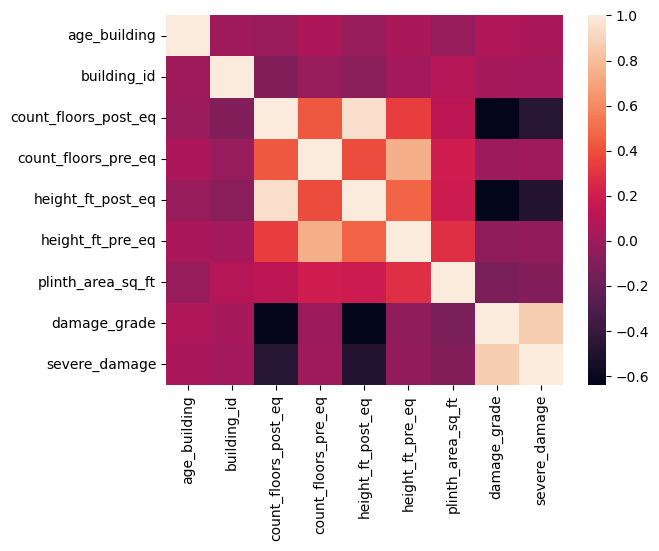

In [54]:
sns.heatmap(c_df1) 

In [55]:
c_df1

,age_building,building_id,count_floors_post_eq,count_floors_pre_eq,height_ft_post_eq,height_ft_pre_eq,plinth_area_sq_ft,damage_grade,severe_damage
age_building,1.000000,0.007005,-0.006417,0.062670,-0.022735,0.047666,-0.019476,0.065040,0.054071
building_id,0.007005,1.000000,-0.100742,-0.024280,-0.072115,0.026557,0.094001,0.035333,0.030686
count_floors_post_eq,-0.006417,-0.100742,1.000000,0.427850,0.946110,0.334143,0.128612,-0.627237,-0.471135
count_floors_pre_eq,0.062670,-0.024280,0.427850,1.000000,0.389641,0.749044,0.196953,-0.000949,0.009729
height_ft_post_eq,-0.022735,-0.072115,0.946110,0.389641,1.000000,0.465845,0.183835,-0.639998,-0.484761
height_ft_pre_eq,0.047666,0.026557,0.334143,0.749044,0.465845,1.000000,0.286794,-0.049942,-0.038585
plinth_area_sq_ft,-0.019476,0.094001,0.128612,0.196953,0.183835,0.286794,1.000000,-0.131706,-0.091149
damage_grade,0.065040,0.035333,-0.627237,-0.000949,-0.639998,-0.049942,-0.131706,1.000000,0.866618
severe_damage,0.054071,0.030686,-0.471135,0.009729,-0.484761,-0.038585,-0.091149,0.866618,1.000000
